# Darwin: optimization vs understanding (I feel the need for speed)

In today’s world speed is everything (okay nearly everything). We value progress over perfection at CK. Keeping that in mind, statistics are complex, time consuming, and difficult to understand. We have been looking for ways to make it faster and simpler to understand and talk about for everyone from our math nerds to our non technical creative types.


We are a data driven company, and that means metrics. Most of our metrics are per user, things like revenue per user, visits per user, engagement per user, clicks per user, etc.


We conduct experiments that generally try to increase one or more of those metrics. In other words we try to answer the question, do people press the button more if the color is blue or red, or does it matter at all? All of our metrics have variance and that’s what makes doing this work challenging. Over the last year we have developed a methodology for comparing the relative performance of the metrics under test.


We call the methodology that we use ‘Pwin’ or probability of winning. It combines three statistics tools bootstrapping (aka resampling), probability density functions (pdf’s), and Montecarlo simulation.


First we choose the distribution of the metric gamma or normal. This is the easy part, for metrics that have a lower limit of zero we use the gamma, for distributions that don’t have a lower limit we use the normal distribution .



In [19]:
import os.path
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [7]:
def genSample(mu, sigma, size):
  rval = np.random.normal(loc=mu, scale=sigma, size=size)
  return ( pd.Series(rval) )

In [41]:
def genSampleNoisy(mu, sigma, size, steps = None, sparseness = None ):
  """
    mu: is the overall mean sample
    sigma: is the noise on each of the steps
    steps: is a list of step values that are offset on each side of the mean
    e.g. mu = 0 , steps = [ 1, 2 ] so the sample will have values equal to
    -2, -1, 0 , 1 , 2 plus the applied noise.
    sparseness: is the fraction of samples that are centered around the mean
    1.0 equals 100% of the sample components are centered around mu
    0.8 equals 80% of the sample is centered at mu, 10% center around the +/- steps
    so mu = 0, steps = [1], sparseness = 0.8, 80% = 0, 10% = -1, 10% = 1
  """
  rval = list()
  values = list()
  for plusMinus in [-1.0, 1.0]:
    for step in steps:
      m = (plusMinus * step) + mu
      values.append(m)
  values.append(mu)
  values.sort()
  idx = 0
  for s in sparseness:
    pieceSize = int(s * size)
    samplePiece = np.random.normal(loc=values[idx], scale=sigma, size=pieceSize)
    rval = rval + list(samplePiece)
    idx += 1
  return ( pd.Series(rval) )

In [44]:
def Bootstrap(data, R = 1000):
    rval = list()
    r = 0
    sampleSize = len(data)
    while r < R:
            tsample = data.sample(n=sampleSize, replace=True)
            avg = tsample.mean()
            rval.append(avg)
            r += 1
    return (pd.Series(rval))

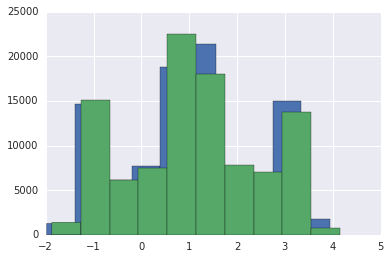

In [43]:
t1 = genSampleNoisy(1,0.25,100000, steps=[1,2], sparseness=[.2,.1,.4,.1,.2])
t2 = genSampleNoisy(1.1,0.25,100000, steps=[1,2], sparseness=[.2,.1,.4,.1,.2])
t1.hist()
t2.hist()


In [45]:
b1 = Bootstrap(t1, 2500)
b2 = Bootstrap(t2, 2500)

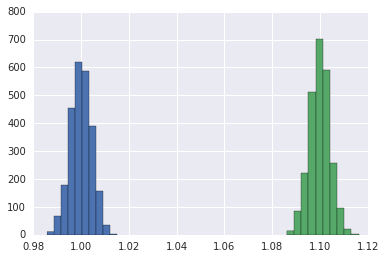

In [46]:
b1.hist()
b2.hist()

In [10]:
sample1 = genSample(1,0.25,100000)
sample2 = genSample(1.1,0.25,100000)
sample3 = genSample(1.1,0.25,100000)
sample4 = genSample(1.0,0.25,100000)

In [5]:
v1 = Bootstrap(sample1, 2500)
v2 = Bootstrap(sample2, 2500)
v3 = Bootstrap(sample3, 2500)
v4 = Bootstrap(sample4, 2500)

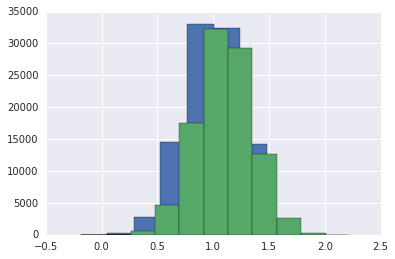

In [11]:
sample1.hist()
sample2.hist()

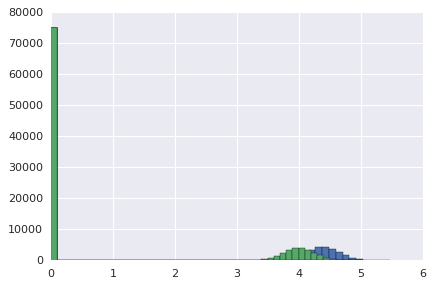

In [11]:
sample3.hist(bins=50)
sample4.hist(bins=50)

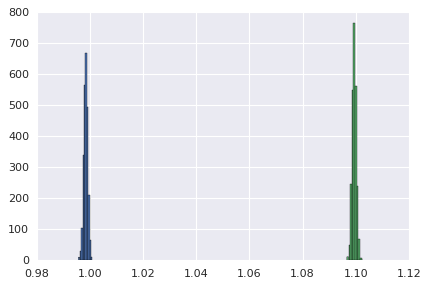

In [12]:
v1.hist()
v2.hist()

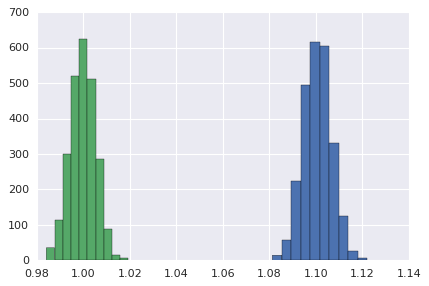

In [13]:
v3.hist()
v4.hist()

In [22]:
print stats.norm.fit(v1.tolist())
print stats.norm.fit(v2.tolist())

(0.99890429717956863, 0.00078227330525242153)
(1.1017442589506594, 0.00079230803544574446)


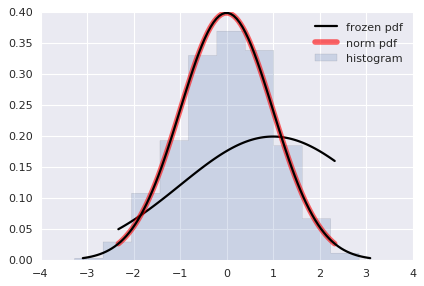

In [73]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
rv = norm(1,2)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')

r = norm.rvs(size=1000)
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2, label = 'histogram')
ax.legend(loc='best', frameon=False)


x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')


plt.show()

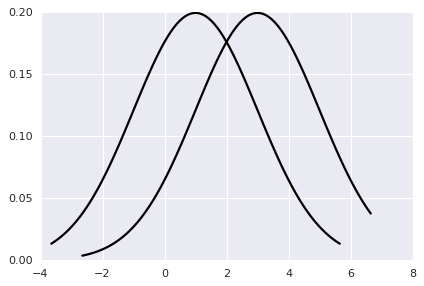

In [74]:
fi, ay = plt.subplots(1, 1)
rv1 = norm(1,2)
rv2 = norm(2,2)
x1 = np.linspace(rv1.ppf(0.01), rv1.ppf(0.99), 100)
x2 = np.linspace(rv2.ppf(0.01), rv2.ppf(0.99), 100)
ay.plot(x1, rv1.pdf(x1), 'k-', lw=2, label='rv1')
ay.plot(x2, rv2.pdf(x1), 'k-', lw=2, label='rv1')